In [205]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from collections import Counter

In [206]:
def func_lyambda(x, y):
    if x < 2:
        return(x + y)
    else:
        return(-2 * x)

In [207]:
def my_distr_func(x):
    if x <= -4.0:
        return(math.e ** (x / 2))
    if (x > -4.0) and (x <= 0.0):
        return(math.e ** (-2))
    if (x > 0.0) and (x <= 2.0):
        return(1 - math.e ** (-x) * (x + 1) + math.e ** (-2))
    if x >= 2.0:
        return(1 - 2 * math.e ** (-x))
    return(f)

C:\Users\ROG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


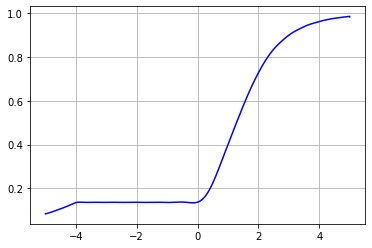

In [208]:
a = -5
b = 5
count_points = 10000
x = np.linspace(a, b, count_points)
y = [my_distr_func(x[i]) for i in range(count_points)]
t = np.polyfit(x, y, 100)
f = np.poly1d(t)
plt.grid()
#print(f)
x1 = np.linspace(a, b, count_points)
plt.plot(x1, f(x1), 'b')
#plt.plot(x, y, 'o')

In [209]:
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x < 0, 0, 1 - math.e ** (-x))

In [210]:
deterministic = deterministic_gen(name="deterministic")
left = -20.5
right = 20.5
delta = 0.0005
count_takes = int((right - left) / delta)

list_x = np.linspace(left, right, count_takes + 1)
list_F_x = deterministic.cdf(list_x)
list_y = np.linspace(left, right, count_takes + 1)
list_F_y = deterministic.cdf(list_y)
#print(list_x)
list_P_x_discr = []
list_P_y_discr = []
for i in range(count_takes):
    list_P_x_discr.append(list_F_x[i + 1] - list_F_x[i])
    list_P_y_discr.append(list_F_y[i + 1] - list_F_y[i])
    
list_x = list_x[1:]
list_y = list_y[1:]
#sum(list_P_discr)

In [211]:
count_model = 1000
yi_takes = np.random.choice(list_y, count_model, p = list_P_y_discr)
xi_takes = np.random.choice(list_x, count_model, p = list_P_x_discr)
#xi_takes

In [212]:
func_x = [func_lyambda(xi_takes[i], yi_takes[i]) for i in range(count_model)]
func_x

[-8.663000000000004,
 1.8649999999999984,
 1.8829999999999991,
 1.4749999999999979,
 0.1769999999999996,
 1.3455000000000013,
 2.9430000000000014,
 0.9924999999999997,
 3.7155000000000022,
 -7.149000000000001,
 2.1905,
 2.7124999999999986,
 1.8329999999999984,
 3.561,
 0.6660000000000004,
 1.6350000000000016,
 1.4345000000000034,
 1.532,
 0.8945000000000043,
 1.8760000000000012,
 2.2734999999999985,
 2.3279999999999994,
 0.4510000000000005,
 3.8545000000000016,
 2.241000000000003,
 1.5594999999999999,
 2.1784999999999997,
 3.579500000000003,
 0.9440000000000026,
 -5.197000000000003,
 2.718,
 -5.374000000000002,
 2.274000000000001,
 1.4650000000000034,
 0.5070000000000014,
 2.0950000000000024,
 1.296000000000003,
 0.6550000000000011,
 0.7654999999999994,
 1.5135000000000005,
 -5.823,
 2.4345000000000034,
 0.6750000000000007,
 1.4334999999999987,
 -7.244,
 2.5504999999999995,
 -7.959000000000003,
 0.3984999999999985,
 -10.472999999999999,
 2.001999999999999,
 1.3100000000000023,
 0.75499

In [213]:
dict_func_x = Counter(func_x)
dict_func_x

Counter({-8.663000000000004: 1,
         1.8649999999999984: 1,
         1.8829999999999991: 1,
         1.4749999999999979: 1,
         0.1769999999999996: 1,
         1.3455000000000013: 1,
         2.9430000000000014: 1,
         0.9924999999999997: 1,
         3.7155000000000022: 1,
         -7.149000000000001: 1,
         2.1905: 1,
         2.7124999999999986: 1,
         1.8329999999999984: 1,
         3.561: 1,
         0.6660000000000004: 2,
         1.6350000000000016: 1,
         1.4345000000000034: 1,
         1.532: 1,
         0.8945000000000043: 1,
         1.8760000000000012: 2,
         2.2734999999999985: 1,
         2.3279999999999994: 1,
         0.4510000000000005: 1,
         3.8545000000000016: 1,
         2.241000000000003: 1,
         1.5594999999999999: 1,
         2.1784999999999997: 1,
         3.579500000000003: 1,
         0.9440000000000026: 1,
         -5.197000000000003: 1,
         2.718: 1,
         -5.374000000000002: 1,
         2.274000000000001: 1

In [214]:
sort_dict_func_x = {}
for i in sorted(dict_func_x.keys()):
    sort_dict_func_x[i] = dict_func_x[i]
sort_dict_func_x

{-22.264000000000003: 1,
 -14.850000000000001: 1,
 -14.347000000000001: 1,
 -14.052: 1,
 -13.68: 1,
 -12.549: 1,
 -12.078000000000003: 1,
 -11.689: 1,
 -10.472999999999999: 1,
 -10.383000000000003: 1,
 -10.176000000000002: 1,
 -9.988: 1,
 -9.896: 1,
 -9.771999999999998: 1,
 -9.486000000000004: 1,
 -8.977000000000004: 1,
 -8.945999999999998: 1,
 -8.719000000000001: 1,
 -8.663000000000004: 1,
 -8.25: 1,
 -8.137: 1,
 -8.097000000000001: 1,
 -7.959000000000003: 1,
 -7.401000000000003: 1,
 -7.283999999999999: 1,
 -7.244: 1,
 -7.149000000000001: 1,
 -7.050000000000004: 1,
 -7.0020000000000024: 1,
 -6.9040000000000035: 1,
 -6.858000000000004: 1,
 -6.832999999999998: 1,
 -6.828000000000003: 1,
 -6.6739999999999995: 1,
 -6.667999999999999: 1,
 -6.617000000000004: 1,
 -6.573999999999998: 1,
 -6.508000000000003: 1,
 -6.463999999999999: 1,
 -6.435000000000002: 1,
 -6.4040000000000035: 1,
 -6.368000000000002: 1,
 -6.255000000000003: 1,
 -6.222999999999999: 1,
 -6.099000000000004: 1,
 -6.058: 1,
 -5

In [215]:
sort_dict_func_P_x = {}
for i in sort_dict_func_x.keys():
    sort_dict_func_P_x[i] = sort_dict_func_x[i] / count_model
sort_dict_func_P_x

{-22.264000000000003: 0.001,
 -14.850000000000001: 0.001,
 -14.347000000000001: 0.001,
 -14.052: 0.001,
 -13.68: 0.001,
 -12.549: 0.001,
 -12.078000000000003: 0.001,
 -11.689: 0.001,
 -10.472999999999999: 0.001,
 -10.383000000000003: 0.001,
 -10.176000000000002: 0.001,
 -9.988: 0.001,
 -9.896: 0.001,
 -9.771999999999998: 0.001,
 -9.486000000000004: 0.001,
 -8.977000000000004: 0.001,
 -8.945999999999998: 0.001,
 -8.719000000000001: 0.001,
 -8.663000000000004: 0.001,
 -8.25: 0.001,
 -8.137: 0.001,
 -8.097000000000001: 0.001,
 -7.959000000000003: 0.001,
 -7.401000000000003: 0.001,
 -7.283999999999999: 0.001,
 -7.244: 0.001,
 -7.149000000000001: 0.001,
 -7.050000000000004: 0.001,
 -7.0020000000000024: 0.001,
 -6.9040000000000035: 0.001,
 -6.858000000000004: 0.001,
 -6.832999999999998: 0.001,
 -6.828000000000003: 0.001,
 -6.6739999999999995: 0.001,
 -6.667999999999999: 0.001,
 -6.617000000000004: 0.001,
 -6.573999999999998: 0.001,
 -6.508000000000003: 0.001,
 -6.463999999999999: 0.001,
 -6.

In [216]:
new_sort_dict_func_P_x = {}
j = 0
for i in sort_dict_func_x.keys():
    new_sort_dict_func_P_x[j] = (i, sort_dict_func_P_x[i])
    j = j + 1
new_sort_dict_func_P_x

{0: (-22.264000000000003, 0.001),
 1: (-14.850000000000001, 0.001),
 2: (-14.347000000000001, 0.001),
 3: (-14.052, 0.001),
 4: (-13.68, 0.001),
 5: (-12.549, 0.001),
 6: (-12.078000000000003, 0.001),
 7: (-11.689, 0.001),
 8: (-10.472999999999999, 0.001),
 9: (-10.383000000000003, 0.001),
 10: (-10.176000000000002, 0.001),
 11: (-9.988, 0.001),
 12: (-9.896, 0.001),
 13: (-9.771999999999998, 0.001),
 14: (-9.486000000000004, 0.001),
 15: (-8.977000000000004, 0.001),
 16: (-8.945999999999998, 0.001),
 17: (-8.719000000000001, 0.001),
 18: (-8.663000000000004, 0.001),
 19: (-8.25, 0.001),
 20: (-8.137, 0.001),
 21: (-8.097000000000001, 0.001),
 22: (-7.959000000000003, 0.001),
 23: (-7.401000000000003, 0.001),
 24: (-7.283999999999999, 0.001),
 25: (-7.244, 0.001),
 26: (-7.149000000000001, 0.001),
 27: (-7.050000000000004, 0.001),
 28: (-7.0020000000000024, 0.001),
 29: (-6.9040000000000035, 0.001),
 30: (-6.858000000000004, 0.001),
 31: (-6.832999999999998, 0.001),
 32: (-6.8280000000

In [217]:
for i in range(1, len(new_sort_dict_func_P_x.keys())):
    new_sort_dict_func_P_x[i] = (new_sort_dict_func_P_x[i][0], new_sort_dict_func_P_x[i][1] + new_sort_dict_func_P_x[i - 1][1])
new_sort_dict_func_P_x

{0: (-22.264000000000003, 0.001),
 1: (-14.850000000000001, 0.002),
 2: (-14.347000000000001, 0.003),
 3: (-14.052, 0.004),
 4: (-13.68, 0.005),
 5: (-12.549, 0.006),
 6: (-12.078000000000003, 0.007),
 7: (-11.689, 0.008),
 8: (-10.472999999999999, 0.009000000000000001),
 9: (-10.383000000000003, 0.010000000000000002),
 10: (-10.176000000000002, 0.011000000000000003),
 11: (-9.988, 0.012000000000000004),
 12: (-9.896, 0.013000000000000005),
 13: (-9.771999999999998, 0.014000000000000005),
 14: (-9.486000000000004, 0.015000000000000006),
 15: (-8.977000000000004, 0.016000000000000007),
 16: (-8.945999999999998, 0.017000000000000008),
 17: (-8.719000000000001, 0.01800000000000001),
 18: (-8.663000000000004, 0.01900000000000001),
 19: (-8.25, 0.02000000000000001),
 20: (-8.137, 0.02100000000000001),
 21: (-8.097000000000001, 0.022000000000000013),
 22: (-7.959000000000003, 0.023000000000000013),
 23: (-7.401000000000003, 0.024000000000000014),
 24: (-7.283999999999999, 0.02500000000000001

In [218]:
model_distr_func = {}
for i in range(len(new_sort_dict_func_P_x.keys())):
    model_distr_func[new_sort_dict_func_P_x[i][0]] = new_sort_dict_func_P_x[i][1]
model_distr_func

{-22.264000000000003: 0.001,
 -14.850000000000001: 0.002,
 -14.347000000000001: 0.003,
 -14.052: 0.004,
 -13.68: 0.005,
 -12.549: 0.006,
 -12.078000000000003: 0.007,
 -11.689: 0.008,
 -10.472999999999999: 0.009000000000000001,
 -10.383000000000003: 0.010000000000000002,
 -10.176000000000002: 0.011000000000000003,
 -9.988: 0.012000000000000004,
 -9.896: 0.013000000000000005,
 -9.771999999999998: 0.014000000000000005,
 -9.486000000000004: 0.015000000000000006,
 -8.977000000000004: 0.016000000000000007,
 -8.945999999999998: 0.017000000000000008,
 -8.719000000000001: 0.01800000000000001,
 -8.663000000000004: 0.01900000000000001,
 -8.25: 0.02000000000000001,
 -8.137: 0.02100000000000001,
 -8.097000000000001: 0.022000000000000013,
 -7.959000000000003: 0.023000000000000013,
 -7.401000000000003: 0.024000000000000014,
 -7.283999999999999: 0.025000000000000015,
 -7.244: 0.026000000000000016,
 -7.149000000000001: 0.027000000000000017,
 -7.050000000000004: 0.028000000000000018,
 -7.002000000000002

C:\Users\ROG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


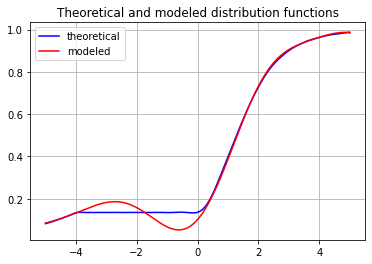

In [219]:
x_model = list(model_distr_func.keys())
y_model = list(model_distr_func.values())
t_model = np.polyfit(x_model, y_model, 100)
f_model = np.poly1d(t_model)
fig, ax = plt.subplots()
ax.set_title('Theoretical and modeled distribution functions')
plt.grid()

#print(f)
x1 = np.linspace(a, b, count_points)
plt.plot(x1, f(x1), 'b', label = 'theoretical')
plt.plot(x1, f_model(x1), 'r', label = 'modeled')
plt.legend(loc=0)
plt.show()
#plt.plot(x, y, 'o')

In [220]:
a = 0
b = 4
count_points = 10000
y = []
x = np.linspace(a, b, count_points)

In [221]:
for cur_x in x:
    y.append(f(cur_x) / f_model(cur_x))

In [222]:
np.mean(y)

1.0185058718933568